In [1]:
# Librerías para BigQuery
from google.cloud import bigquery
# Librerías adicionales para manejo de archivos
from google.colab import files
# Autenticación en Google Cloud
from google.colab import auth
auth.authenticate_user()
# Configuración de BigQuery (puedes añadir tu project_id aquí)
project_id = 'datalab-433117'
client = bigquery.Client(project=project_id)


In [2]:
from google.colab import auth
from google.cloud import bigquery

# Autenticación en Google Cloud
auth.authenticate_user()

# Configuración del proyecto de Google Cloud
project_id = 'datalab-433117'
client = bigquery.Client(project=project_id)

# Consulta en BigQuery para obtener los datos de la tabla 'new_amazon_review'
query = """
SELECT *
FROM `datalab-433117.dataset.tabla_unificada`
"""

# Ejecuta la consulta y convierte los resultados en un DataFrame
query_job = client.query(query)
df = query_job.to_dataframe()

# Muestra las primeras filas del DataFrame
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product,primary_category,user_names,user_count,review_titles,review_content,img_link,product_link,rating,rating_count,avg_sentiment,title_sentiment_label
0,B08L879JSN,Acer EK220Q 21.5 Inch (54.61 cm) Full HD (1920...,Computers&Accessories|Monitors,6299.0,13750.0,0.54,21.5 Inch VA Panel Full HD 1920 X 1080 Resolut...,Computers&Accessories,"Yatharth Patil, Alpesh Rathva, Sathish, Muzamm...",8,"its a good 1080 monitor, price relaetd issue, ...",Good product i am giving this review after 2mo...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Acer-Features-Bluelight-...,4.2,2014,0.283688,Neutral
1,B07JF9B592,MAONO AU-400 Lavalier Auxiliary Omnidirectiona...,MusicalInstruments|Microphones|Condenser,478.0,699.0,0.32,4-pole jack is compatible for laptop which has...,MusicalInstruments,"Dinesh S, Shahrukh, Manish Rautela, ˢᴰ82ˢᶜ ✔️,...",8,"Good for price, In budget, Avrage in budget ra...",at Rs.319 it's a great deal. I use it for mobi...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Maono-AU-400-Lavalier-Mi...,3.8,20218,0.291813,Neutral
2,B096VF5YYF,"boAt Xtend Smartwatch with Alexa Built-in, 1.6...",Electronics|WearableTechnology|SmartWatches,2999.0,7990.0,0.62,Alexa- Alexa built-in Voice Assistant that set...,Electronics,"Mohammed.afsar, Divya Devkar, archit, Vaishnav...",8,"Wach not working, 👍, NOt worth the money, I do...",Review OverviewAverage2.7The Boat today launch...,https://m.media-amazon.com/images/I/41pfjyUPZL...,https://www.amazon.in/boAt-Smartwatch-Multiple...,4.1,48449,0.221650,Neutral
3,B0972BQ2RS,Fire-Boltt India's No 1 Smartwatch Brand Ring ...,Electronics|WearableTechnology|SmartWatches,2499.0,9999.0,0.75,Fire-Boltt is India' No 1 Wearable Watch Brand...,Electronics,"chetan J, Ravikumar_Mani_INDIA, Deepak Vincent...",8,"elegant look, Descent looking, There is a bit...","Great watch, good features. Easy and simple to...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Fire-Boltt-Smartwatch-Mo...,4.1,42139,0.147500,Neutral
4,B0BD92GDQH,"OnePlus Nord Watch with 1.78” AMOLED Display, ...",Electronics|WearableTechnology|SmartWatches,4999.0,6999.0,0.29,"【1.78"" AMOLED display】500nit peak brightness &...",Electronics,"lattaben parikh, Varun Nair, SYED SHABEENA, Si...",8,"Got this watch at 4499, Premium build watch wi...",I really suprise there is no Bluetooth calling...,https://m.media-amazon.com/images/I/31OgHTags6...,https://www.amazon.in/OnePlus-Display-Refresh-...,3.8,758,-0.055013,Neutral


<ipython-input-3-88a75f562052>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette=amazon_colors)
<ipython-input-3-88a75f562052>:12: UserWarning: 
The palette list has fewer values (4) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=category_counts.values, y=category_counts.index, palette=amazon_colors)


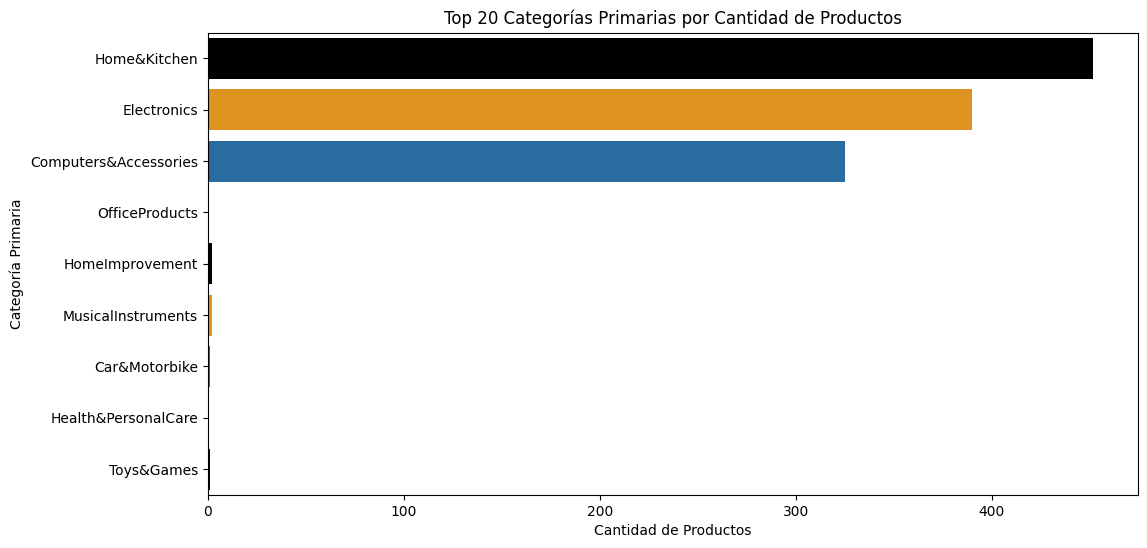

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define los colores
amazon_colors = ['#000000', '#FF9900', '#146EB4', '#FFFFFF']

# Agrupa por primary_category y cuenta la cantidad de product_id
category_counts = df.groupby('primary_category')['product_id'].count().sort_values(ascending=False).head(20)

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.values, y=category_counts.index, palette=amazon_colors)
plt.title('Top 20 Categorías Primarias por Cantidad de Productos')
plt.xlabel('Cantidad de Productos')
plt.ylabel('Categoría Primaria')
plt.show()


El gráfico muestra que las categorías "Home & Kitchen" y "Electronics" tienen la mayor cantidad de productos en el dataset. Esto indica que estas categorías son las más populares o tienen la mayor diversidad de productos en la plataforma.

Se puede observar que hay una gran diferencia en la cantidad de productos entre las categorías principales. Esto podría indicar que la plataforma tiene una mayor concentración de productos en ciertas áreas y menos en otras.

# **Distribución Variables Númericas**

---



---



1.  **Distribución de precios (actual y con descuento) por categoría**

<Figure size 4000x800 with 0 Axes>

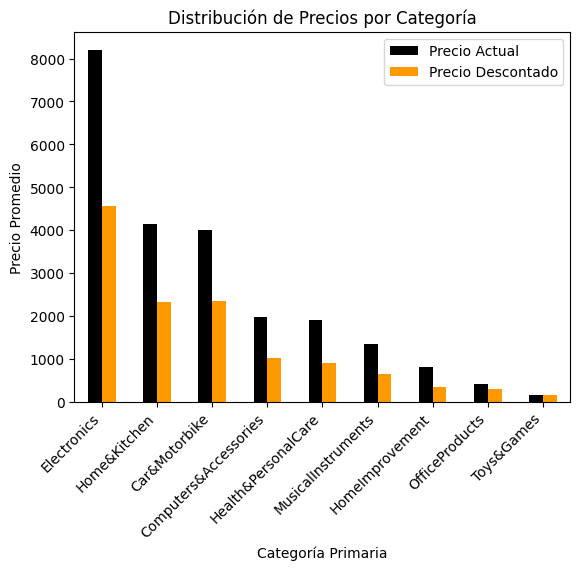

In [4]:
# Agrupa por primary_category y calcula la media de actual_price y discounted_price
price_stats = df.groupby('primary_category')[['actual_price', 'discounted_price']].mean().sort_values(by='actual_price', ascending=False).head(20)

# Crea el gráfico de barras combinado
plt.figure(figsize=(40, 8))
price_stats.plot(kind='bar', color=amazon_colors[:2])
plt.title('Distribución de Precios por Categoría')
plt.xlabel('Categoría Primaria')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45, ha='right')
plt.legend(['Precio Actual', 'Precio Descontado'])
plt.show()


- Se observa que algunas categorías tienen precios promedio más altos que otras.
- La diferencia entre el precio actual y el precio con descuento varía entre las categorías.


2. **Distribución de Porcentajes de Descuento**

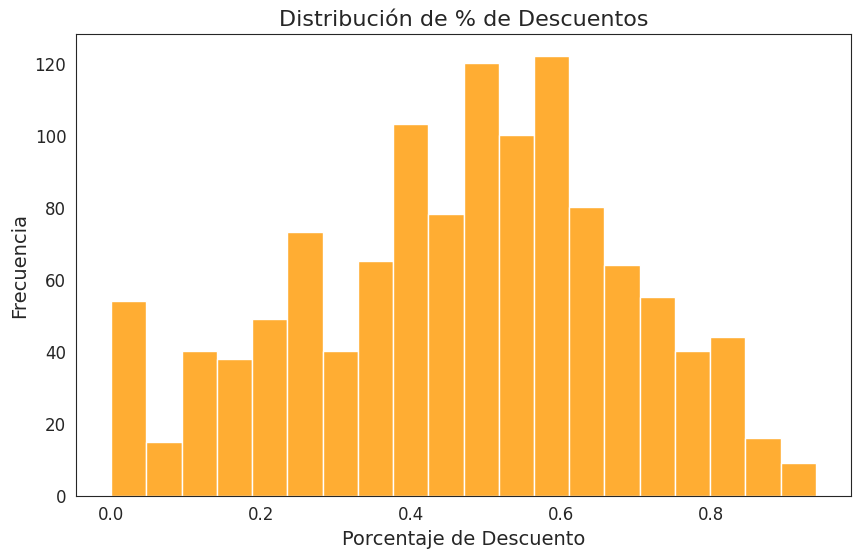

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo sin cuadrícula
sns.set_style("white")

# Crea el histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['discount_percentage'], bins=20, kde=False, color=amazon_colors[1], edgecolor=None, alpha=0.8)
plt.title('Distribución de % de Descuentos', fontsize=16)
plt.xlabel('Porcentaje de Descuento', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Desactiva las líneas de cuadrícula
plt.grid(False)

# Ajusta las etiquetas de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Muestra el gráfico
plt.show()


- La mayoría de los productos tienen un porcentaje de descuento bajo.
- Hay una pequeña cantidad de productos con descuentos muy altos.

3. **Distribución por Calificaciones**

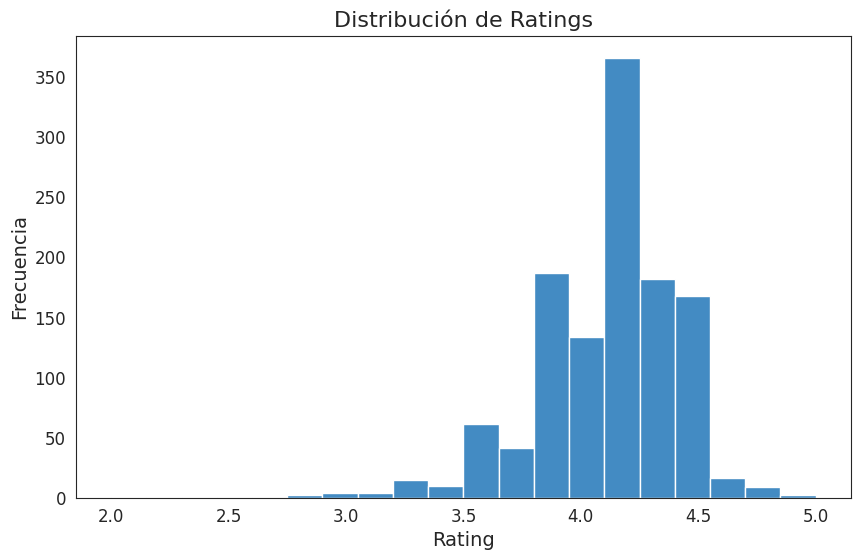

In [6]:
# Estilo sin cuadrícula
sns.set_style("white")

# Crea el histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=20, kde=False, color=amazon_colors[2], edgecolor=None, alpha=0.8)
plt.title('Distribución de Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Desactiva las líneas de cuadrícula
plt.grid(False)

# Ajusta las etiquetas de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Muestra el gráfico
plt.show()


- La mayoría de los productos tienen ratings altos.
- Hay una pequeña cantidad de productos con ratings bajos.

4. **Distribución de productos por Categoría**

<ipython-input-8-6ced9c9722aa>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette=amazon_colors)
<ipython-input-8-6ced9c9722aa>:8: UserWarning: 
The palette list has fewer values (4) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=category_counts.values, y=category_counts.index, palette=amazon_colors)


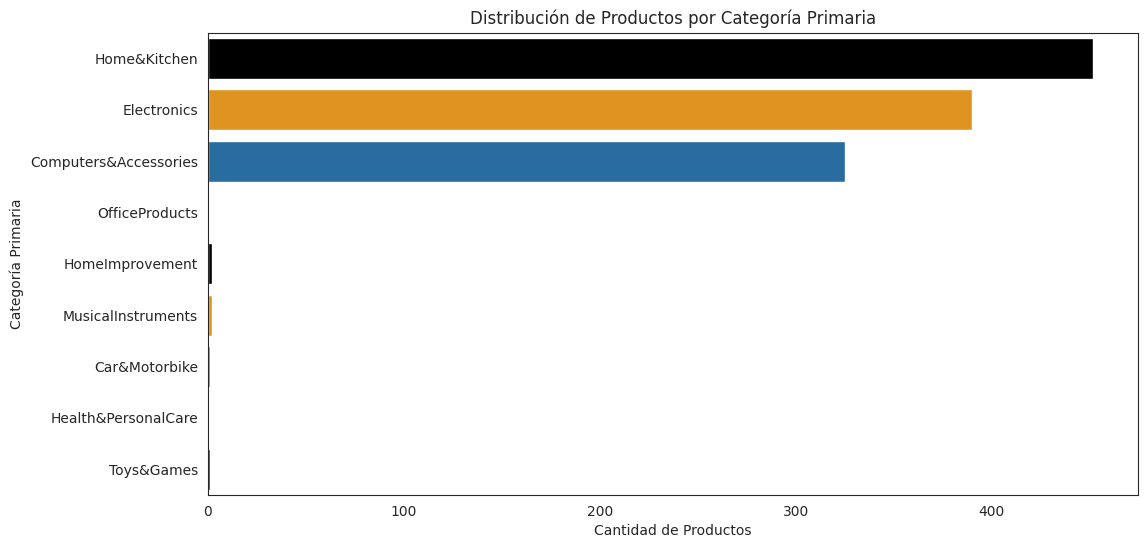

In [8]:
# Agrupa por primary_category y cuenta la cantidad de product_id
category_counts = df.groupby('primary_category')['product_id'].count().sort_values(ascending=False)

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.values, y=category_counts.index, palette=amazon_colors)
plt.title('Distribución de Productos por Categoría Primaria')
plt.xlabel('Cantidad de Productos')
plt.ylabel('Categoría Primaria')
plt.show()


- Confirma la observación del primer gráfico, mostrando la distribución de productos en todas las categorías.

**5. Distribución de Análisis de Sentimientos**

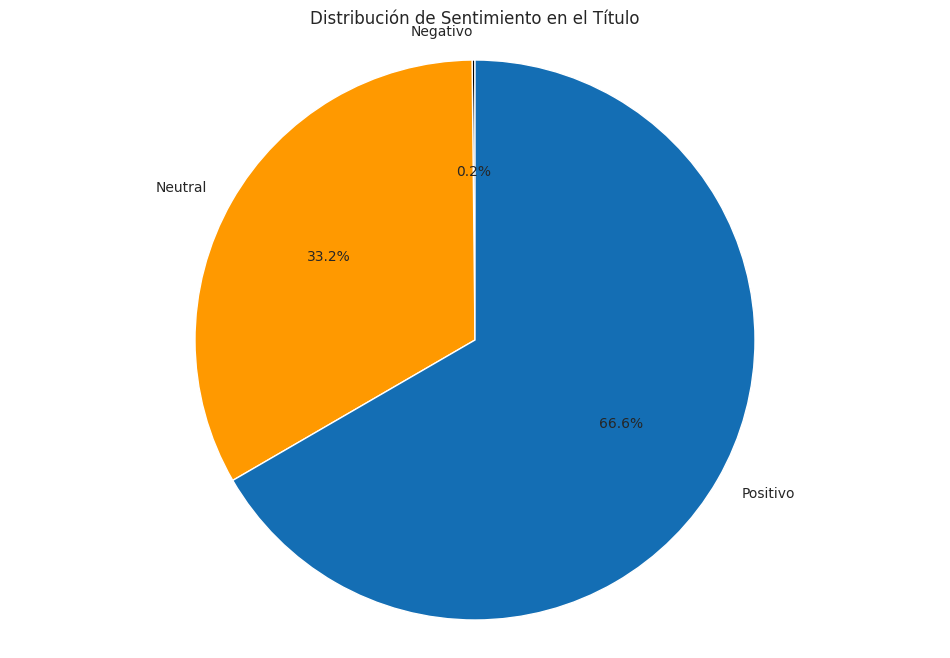

In [14]:
# Agrupa por title_sentiment_label y cuenta la cantidad de registros
sentiment_counts = df.groupby('title_sentiment_label')['product_id'].count()

# Crea el gráfico de torta
plt.figure(figsize=(12, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=amazon_colors[:3])
plt.title('Distribución de Sentimiento en el Título')
plt.axis('equal')  # Asegúrate de que el gráfico sea un círculo
plt.show()


- La mayoría de los títulos tienen un sentimiento positivo.
- Hay una pequeña cantidad de títulos con sentimiento negativo o neutral.